In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
import time
np.random.seed(5)

In [3]:
def auction_exp(data_auction, p):
    """auction experiment simulation

    Args:
        data_auction: random sample data for auction simulation
        p: the reserve price
        
    Return:
        revenue: the expected revenue
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #charge the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [4]:
def rejection_sampling(pi1, pi2, N):
    """rejection sampling algorithm

    Args:
        pi1,pi2: the range of log-lottery distribution
        N: the number of samples from the log-lottery distribution
        
    Return:
        rej_sample: The random samples from the log-lottery distribution
    """

    #using rejection sampling, get N random price samples
    n = 0
    don = pi2*np.log(pi2/pi1) - (pi2-pi1)
    env =(pi2/pi1-1)/don
    rej_sample =[]
    while(n <= N):
        x = uniform.rvs(loc=pi1, scale=pi2-pi1)
        #a is acception probability
        a = (pi2/x-1)/don/env
        u1 = uniform.rvs()
        if (u1 <= a):
            rej_sample.append(x)
            n += 1
    return rej_sample

In [11]:
# Experiment deterministic and randomized auctions for single-item and single-bidder case with uniform distribution
sigma_list = []
DAPX_uniform = []
r_list =[]
p_d_list = []


#Definition 3.1: rho_D function used to compute DAPX
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#Definition 5.1:  rho function used to compute the APX theoretical upper bound
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

#Function f used to solve pi1 for log-lottery distribution
def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )


#step =np.linspace(0, 5,5)
step = np.arange(0, 5.1,0.1)
n = 1000000
tic = time.clock()
for i in step:
    #we start uniform distribution U[0,10], the gradually shrink its support range
    b = 10 - i
    a = 10 -b
    u = (a+b)/2
    sigma = np.sqrt((b-a)**2/12)

    r = sigma/u
    r_list.append(r)
    sigma_list.append(sigma)
    bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
    #use numerical solver to solve the ratio value, then compute the reserve price
    p_d = fsolve(rho_D, [u])
    print(rho_D(p_d))
    p_d_list.append(p_d)
    p_reserve = p_d*u/(2*p_d-1)
    #Expertiment Giannakopoulos et al. auction
    exp_revenue = auction_exp(bid_uniform,p_reserve)
    
    #Following we experiment the optimal auction for uniform distribution
    if (b/2 >= a):
        opt = auction_exp(bid_uniform,b/2)
    else:
        opt = auction_exp(bid_uniform,a)
    ########################################################################    
    
    #Compute the experimental DAPX
    DAPX_uniform.append((opt/exp_revenue)[0])  


toc = time.clock()
print('time: ' + str(toc-tic))


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[0.]
[0.]
[5.55111512e-17]
[2.22044605e-16]
[3.88578059e-16]
[9.43689571e-16]
[1.99840144e-15]
[4.49640325e-15]
[1.01307851e-14]
[2.77555756e-17]
[2.77555756e-17]
[-2.77555756e-17]
[-5.55111512e-17]
[0.]
[-2.77555756e-17]
[-2.77555756e-17]
[0.]
[2.77555756e-17]
[0.]
[2.77555756e-17]
[8.32667268e-17]
[1.94289029e-16]
[6.9388939e-16]
[2.3869795e-15]
[8.04911693e-15]
[1.38777878e-17]
[-1.38777878e-17]
[0.]
[1.38777878e-17]
[0.]
[-6.9388939e-18]
[2.77555756e-17]
[1.38777878e-16]
[1.0269563e-15]
[6.9458328e-15]
[-1.04083409e-17]
[-1.38777878e-17]
[1.38777878e-17]
[2.08166817e-17]
[2.25514052e-16]
[4.8398785e-15]
[-8.67361738e-18]
[3.46944695e-18]
[1.08420217e-16]
[4.33680869e-18]
[-2.16840434e-18]
[2.10638798e-15]
[9.75781955e-18]
[8.67361738e-19]
[2.03745983e-15]
[8.7581154e-47]
time: 107.07213579999996


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


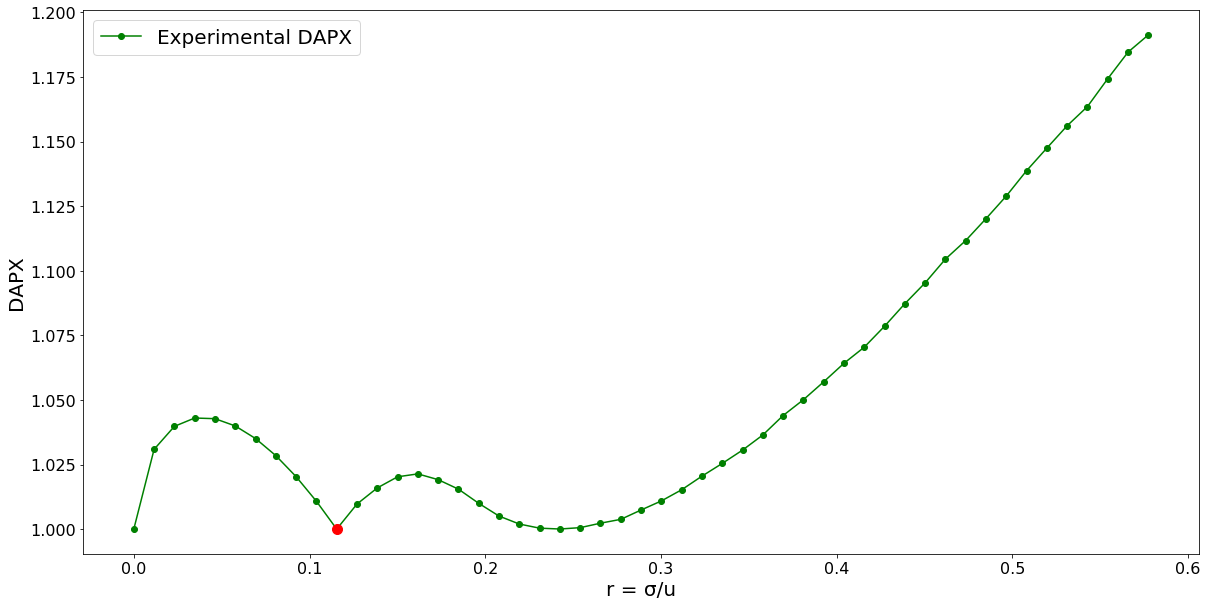

In [21]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
ax.tick_params(axis='x', labelsize= 16)
ax.tick_params(axis='y', labelsize= 16)

#plot with experimental and theoretical values for DAPX

ax.plot(r_list, DAPX_uniform,color="green",marker="o",label="Experimental DAPX")
#ax.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")

ax.plot(r_list[40], DAPX_uniform[40], color="red",marker="o",markersize=10)

# set x-axis label
ax.set_xlabel("r = \u03C3/u",fontsize=20)
# set y-axis label
ax.set_ylabel("DAPX",fontsize=20)
#ax.set_ylim(0.5,3.4)


#plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
plt.legend(loc="upper left",fontsize = 20)
plt.savefig("uniform_dapx_only.png",bbox_inches='tight')
plt.show()


In [ ]:
# Experiment the randomized robust auction for single-item and single-bidder case with uniform distributions
sigma_list = []
DAPX_uniform = []
r_list =[]
r_rho_list=[]
APX_uniform_list = []

#Definition 3.1: rho_D function used to compute DAPX
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#Definition 5.1:  rho function used to compute the APX theoretical upper bound
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

#Function f used to solve pi1 for log-lottery distribution
def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )


#step =np.linspace(0, 5,5)
step = np.arange(0, 5, 0.1)
n = 1000000
tic = time.clock()
for i in step:
    #we start uniform distribution U[0,10], the gradually shrink its support range
    b = 10 - i
    a = 10 -b
    u = (a+b)/2
    sigma = np.sqrt((b-a)**2/12)

    r = sigma/u
    r_list.append(r)
    sigma_list.append(sigma)
    bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
    
    #Following we experiment the optimal auction for uniform distribution
    if (b/2 >= a):
        opt = auction_exp(bid_uniform,b/2)
    else:
        opt = auction_exp(bid_uniform,a)
    ########################################################################    

    #First solve pi1 and pi2 using numerical solver and then generate the samples from 
    #the corresponding log-lottery distribution.
    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.5])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2,n)
    rexp_revenue_list =[]
    #For each reserve price, perform auction experiment and save all the results
    for rp_reserve in rej_sample:
        rexp_revenue_list.append(auction_exp(uniform.rvs(loc=a, scale=b-a,size=1),rp_reserve))
    #Determine the experimental APX with optimal revenue against the average revenue
    APX_uniform_list.append(opt/np.average(rexp_revenue_list))
    
    #compute the APX theoretical upper bound using function rho from Definition 4.1
    r_rho = fsolve(random_rho, [u])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))

toc = time.clock()
print('time: ' + str(toc-tic))


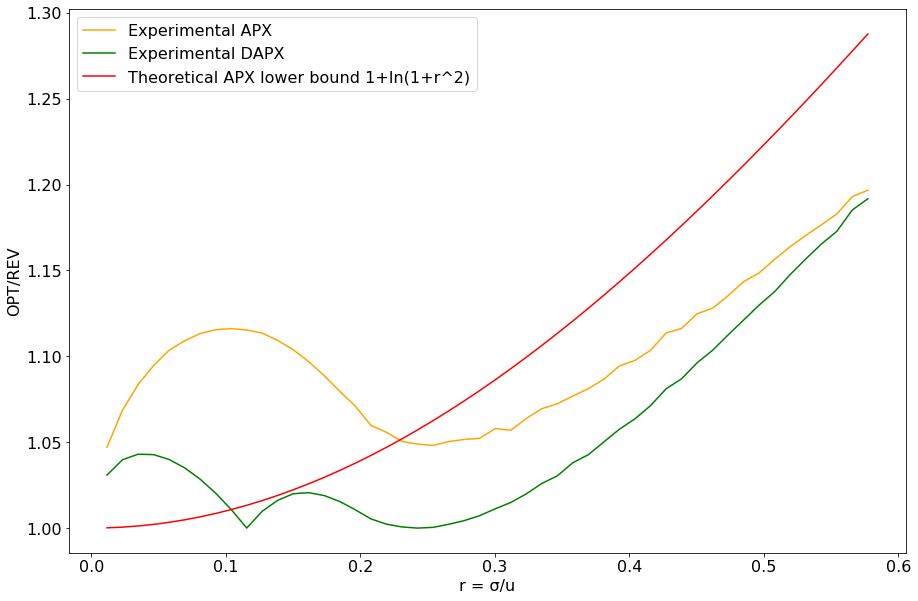

In [66]:
plt.figure(figsize=(15,10))
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("OPT/REV",fontsize=16)
plt.tick_params(axis='x', labelsize= 16)
plt.tick_params(axis='y', labelsize= 16)
#plot with experimental and theoretical values for DAPX and APX
plt.plot(r_list, APX_uniform_list,color="#FFA500",label="Experimental APX")
plt.plot(r_list, DAPX_uniform,color="green",label="Experimental DAPX")

lower_bound = 1+np.log(1+np.power(r_list,2))
#plt.plot(r_list, r_rho_list,color="blue",label="Theoretical APX upper bound \u03C1")
plt.plot(r_list, lower_bound,color="red",label="Theoretical APX lower bound 1+ln(1+r^2)")
plt.legend(loc="upper left",fontsize = 16)
#plt.savefig("apxuni.png",bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd 
lower_bound = 1+np.log(1+np.power(r_list,2))  
# creating the DataFrame 
my_df = { 'r' : r_list,
          'DAPX_uniform': DAPX_uniform,
         'theoretical DAPX':p_d_list,
         'APX_uniform_list': APX_uniform_list, 
         'upper_bound':r_rho_list,
         'lower_bound':lower_bound
         } 
df = pd.DataFrame(my_df) 
  
   
# saving the DataFrame as a CSV file 
gfg_csv_data = df.to_csv('apx_uniform.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 


In [ ]:
#rejection sampling example

def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )

N = 100000

u = 1
sigma = 1

k2 = u**2 + sigma**2
pi1 = fsolve(f, [u])
pi2 = 0.5*(k2/pi1 +pi1)
print(pi1, pi2)

rej_sample = []
rej_sample = rejection_sampling(pi1,pi2,n)
#calculate probability density using actual formula
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


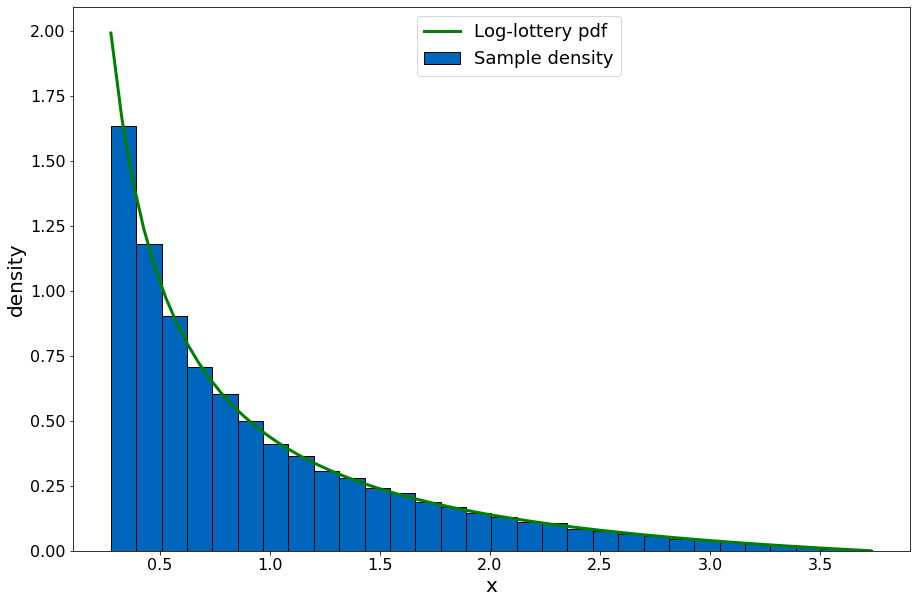

In [58]:

plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 16)
plt.tick_params(axis='y', labelsize= 16)

plt.xlabel("x",fontsize=20)
plt.ylabel("density",fontsize=20)

plt.hist(rej_sample, color = '#0065bd',normed=True, edgecolor = 'black',bins = 30, label = "Sample density")
plt.plot(x,y,color = 'green',linewidth=3,label = "Log-lottery pdf")

plt.legend(loc="upper left",fontsize = 18,bbox_to_anchor=(0.4,1))
plt.savefig("rejectionS.png",bbox_inches='tight')
plt.show()
